### 1) Universal Functions (ufunc)

Una función universal (o ufunc para abreviar) es una función que opera en ndarrays elemento por elemento, admitiendo la transmisión de matrices, la conversión de tipos y varias otras características estándar. Es decir, un ufunc es un contenedor "vectorizado" para una función que toma un número fijo de entradas específicas y produce un número fijo de salidas específicas.

###### Ufuncs unarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [4]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [5]:
np.log(arr)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458])

In [6]:
np.cos(arr)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029,  0.75390225, -0.14550003, -0.91113026])

In [7]:
np.cumsum(arr)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

###### Ufuncs binarios

In [11]:
x = np.random.randn(8)
y = np.random.randn(8)

print(x, y)

(array([-1.64537092,  0.98381152,  1.46270664,  0.91787897, -1.89306525,
       -0.71204471, -0.92816474, -0.62010435]), array([-0.58775356, -1.68907755,  1.0567892 ,  0.91229117,  0.75622955,
       -0.00372123,  0.24924227,  0.391083  ]))


In [12]:
np.maximum(x, y)

array([-0.58775356,  0.98381152,  1.46270664,  0.91787897,  0.75622955,
       -0.00372123,  0.24924227,  0.391083  ])

In [13]:
arr = np.random.randn(7)
arr

array([ 1.47696019,  0.27390037, -0.5714734 , -1.62354313,  0.52273612,
        0.54997406, -0.09450552])

In [16]:
remainder, whole_part = np.modf(arr)
print(whole_part)

[ 1.  0. -0. -1.  0.  0. -0.]


Ufuncs acepta un argumento de salida opcional que les permite reemplazar diréctamente el vector:

In [18]:
np.sqrt(whole_part, whole_part) # whole_part = np.sqrt(whole_part)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([ 1.,  0., -0., nan,  0.,  0., -0.])

In [19]:
whole_part

array([ 1.,  0., -0., nan,  0.,  0., -0.])

### 2) Vectorización

El tiempo de ejecución se vuelve una variable sustancial en el manejo de datos y crucial para decidir si una aplicación es confiable o no. Nuestro objetivo siempre se enfocará en ejecutar un algoritmo de gran tamaño en el menor tiempo posible cuando hablamos buscar resultados en tiempo real.

In [20]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size=5)
values

array([6, 1, 4, 4, 8])

In [21]:
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [26]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1 loop, best of 3: 241 ms per loop


In [28]:
values

array([6, 1, 4, 4, 8])

In [27]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [29]:
%timeit (1.0 / big_array)

100 loops, best of 3: 3.94 ms per loop


### Ejercicio realizado por el profesor

Supongamos que deseamos evaluar la función:

$$\sqrt{x^2 + y^2}$$ 

a través de una cuadrícula regular de valores. La función np.meshgrid toma dos matrices 1D y produce dos matrices 2D correspondientes a todos los pares de (x, y) en las dos matrices:

In [33]:
datos = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(datos, datos)

In [34]:
z = np.sqrt( x ** 2 + y ** 2)
z

array([[7.07106781, 7.00071425, 6.93108938, ..., 6.86221539, 6.93108938,
        7.00071425],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       ...,
       [6.86221539, 6.78969808, 6.71788657, ..., 6.64680374, 6.71788657,
        6.78969808],
       [6.93108938, 6.85930026, 6.7882251 , ..., 6.71788657, 6.7882251 ,
        6.85930026],
       [7.00071425, 6.92964646, 6.85930026, ..., 6.78969808, 6.85930026,
        6.92964646]])

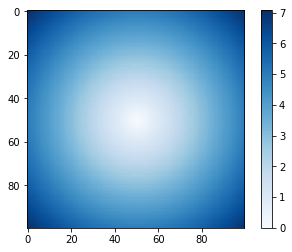

In [39]:
plt.imshow(z, cmap = plt.cm.Blues)
plt.colorbar();

### Ejercicio realizado por el alumno

Evaluar la función:

$$\sin(x)^{10} + \cos(10 + yx) \cos(x)$$

Empleando las mismas coordenadas de x y y; adicionalmente, aplique una barra de color diferente para el plot.

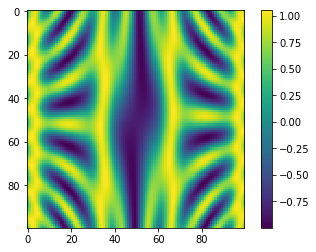

In [41]:
# Solución 
a = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
plt.imshow(a, cmap = "viridis")
plt.colorbar();

### Condicionales en la vectorización


In [43]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Supongamos que quisiéramos tomar un valor de xarr siempre que el valor correspondiente en cond sea True y, de lo contrario, tomar el valor de yarr. Realizando este procedimiento en una lista podría verse así:

In [47]:
[(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

[1.1, 2.2, 1.3, 1.4, 2.5]

In [48]:
np.where(cond, xarr, yarr)

array([1.1, 2.2, 1.3, 1.4, 2.5])

Un uso típico de where en el análisis de datos es producir una nueva matriz de valores basada en otra matriz. Suponga que tiene una matriz de datos generados aleatoriamente y desea reemplazar todos los valores positivos con 2 y todos los valores negativos con -2. _¿Cómo lo haría?_

In [49]:
arr = np.random.randn(4, 4)
arr

array([[-0.2036955 ,  0.40205611,  0.256278  , -0.47187549],
       [ 1.59438289,  0.59445381, -0.0420434 , -0.07553812],
       [-0.77168134, -0.84959149, -1.33496389, -1.01773392],
       [ 0.64718411,  1.13623856, -0.11759399, -0.32332243]])

In [50]:
arr > 0 

array([[False,  True,  True, False],
       [ True,  True, False, False],
       [False, False, False, False],
       [ True,  True, False, False]])

In [51]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2, -2],
       [ 2,  2, -2, -2],
       [-2, -2, -2, -2],
       [ 2,  2, -2, -2]])

Puede combinar escalares y matrices al usar np.where. Por ejemplo, puedo reemplazar todos los valores positivos en arr con la constante 2 así:

In [52]:
np.where(arr > 0, 2, arr)

array([[-0.2036955 ,  2.        ,  2.        , -0.47187549],
       [ 2.        ,  2.        , -0.0420434 , -0.07553812],
       [-0.77168134, -0.84959149, -1.33496389, -1.01773392],
       [ 2.        ,  2.        , -0.11759399, -0.32332243]])

### Ejercicios para estudiantes

1) Dada la matriz arr generada en el punto anterior, reemplace todos aquellos valores negativos por su valor absoluto utilizando la función where:

In [55]:
np.where(arr < 0, abs(arr), arr)

array([[0.2036955 , 0.40205611, 0.256278  , 0.47187549],
       [1.59438289, 0.59445381, 0.0420434 , 0.07553812],
       [0.77168134, 0.84959149, 1.33496389, 1.01773392],
       [0.64718411, 1.13623856, 0.11759399, 0.32332243]])

2) Genere un vectór aleatorio de 100 datos que sigan la distribución normal. Calcule el número de valores positivos generados.

In [59]:
arr = np.random.randn(100)
(arr > 0).sum()

50

3) A continuación, se presenta un proceso de caminata aleatoria simulado. En primer lugar, comente cada línea de código con un breve resúmen de lo que hace (si desconoce alguna función en específico, procure identificar su funcionalidad de forma autónoma, sin recurrir al profesor o a internet); tras entender cada línea, proceda a resolver los siguientes ejercicios en orden:

+ Realice el mismo proceso de caminata aleatoria sin utilizar el ciclo for y empleando únicamente vectóres y funciones de numpy.
+ ¿Cuál es el valor mínimo y máximo alcanzado por la serie entre los pasos 100 y 300?
+ ¿Cuánto tiempo le tomó a la caminata aleatoria alejarse al menos 10 pasos del origen 0 en cualquier dirección?

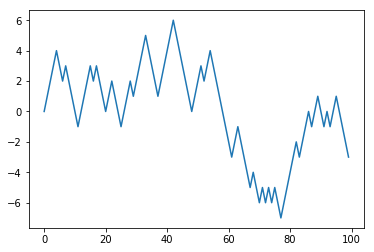

In [60]:
np.random.seed(104)

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if np.random.randint(0,2) else -1 
    position += step
    walk.append(position)
    
plt.plot(walk[:100]);

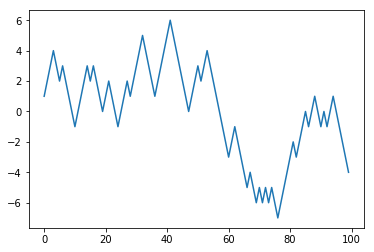

In [61]:
# 1 
np.random.seed(104)
f = np.random.randint(0,2,1000)
al = np.where(f==0, -1, f)
suma = np.cumsum(al)
plt.plot(suma[:100]);



In [ ]:
# 2 


In [ ]:
# 3 


### 3) Pandas

In [63]:
import pandas as pd

#### Series

La representación de cadena de una serie que se muestra de forma interactiva muestra el índice a la izquierda y los valores a la derecha. Dado que no especificamos un índice para los datos, se crea uno predeterminado que consta de los números enteros de 0 a N - 1 (donde N es la longitud de los datos).

In [64]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [65]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [66]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [67]:
obj2 = pd.Series([4, 7, -5, 3], index =["d", "b", "a", "c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [69]:
obj2["d"] = 6 
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [70]:
obj2[["d","a","c"]]

d    6
a   -5
c    3
dtype: int64

In [72]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [73]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

En comparación con las matrices de NumPy, en Pandas se pueden usar etiquetas en el índice al seleccionar valores únicos o un conjunto de valores:

In [75]:
population_dict = {"California": 38332521,
 "Texas": 26448193,
 "New York": 19651127,
 "Florida": 19552860,
 "Illinois": 12882135}

population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [76]:
population["California":"Illinois"]

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

#### DataFrames

Si una Serie es un análogo de una matriz unidimensional con índices flexibles, un DataFrame es un análogo de una matriz bidimensional con índices de fila flexibles y nombres de columna flexibles.

In [77]:
area_dict = {"California": 423967, "Texas": 695662, "New York": 141297,
             "Florida": 170312, "Illinois": 149995}

area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

Ahora que tenemos esto junto con la serie de población de antes, podemos usar un
diccionario para construir un solo objeto bidimensional que contenga esta información:

In [78]:
states = pd.DataFrame({"Población": population,"Área": area}) 
states

,Población,Área
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


In [79]:
states.index

Index([u'California', u'Florida', u'Illinois', u'New York', u'Texas'], dtype='object')

In [80]:
states.columns

Index([u'Población', u'Área'], dtype='object')